In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns
import pandas as pd

In [16]:
from p2nd.utils.parse_cif import load_structure
from p2nd.utils.dssp import model_to_dssp, dssp_to_chain_labels
from p2nd.core.features import chain_to_features

# test the flow
#file_path = "data/dev/mmCIF/1a4e.cif"
file_path = "data/dev/mmCIF/1mi1.cif"

structure = load_structure(file_path)
model = structure[0]
chain = next(model.get_chains(), None)
features = chain_to_features(chain)
dssp = model_to_dssp(model, in_file=file_path)
labels = dssp_to_chain_labels(dssp, "A")

print(f"Features shape: {features.shape}")
print(f"Labels shape: {len(labels)}")

Loaded structure: 1mi1
Features shape: (414, 23)
Labels shape: 414


In [24]:
for i in labels:
    print(i)

-
-
-
-
E
E
E
E
E
E
E
E
E
T
T
E
E
E
E
E
E
E
E
E
-
S
S
E
E
E
E
E
E
-
T
T
-
H
H
H
H
T
S
-
H
H
H
H
H
H
-
-
-
T
T
-
E
E
E
G
G
G
E
E
E
E
E
E
E
E
E
T
T
E
E
E
E
E
E
E
E
E
T
T
S
-
E
E
E
E
E
-
S
-
H
H
H
H
H
H
H
H
H
T
S
-
S
-
T
T
-
S
T
T
-
-
-
-
-
H
H
H
H
H
S
-
H
H
H
H
H
H
T
-
S
H
H
H
H
H
H
T
T
S
S
-
H
H
H
H
H
H
H
H
H
H
H
T
T
-
-
T
T
-
G
G
G
-
-
-
B
-
-
-
B
-
-
-
S
S
S
S
-
-
T
T
-
G
G
G
B
-
-
T
T
S
-
G
G
G
S
S
H
H
H
H
H
H
H
H
H
H
H
H
T
-
-
-
S
S
-
-
-
-
S
B
S
S
-
S
S
-
H
H
H
H
H
H
H
T
T
T
S
T
T
H
H
H
H
H
H
H
T
T
T
T
S
-
-
-
T
T
T
S
S
-
B
H
H
H
H
H
H
H
H
H
H
-
T
T
-
-
-
-
B
-
G
G
G
G
T
-
G
G
G
G
S
-
-
-
-
S
S
-
-
-
T
T
T
S
-
-
-
-
-
P
B
P
P
T
T
-
S
S
H
H
H
H
H
H
H
H
H
H
H
H
T
S
H
H
H
H
T
T
H
H
H
H
H
H
H
H
T
S
T
T
S
S
S
H
H
H
H
H
T
T
-
-
B
-
T
T
T
S
T
T
S
-
-
T
T
T
-
-
S
H
H
H
H
H
H
H
H
H
H
H
H
H
H
-
-
P
P
P
P
-
-
S
S
P
P
P
P
-


In [17]:
features.shape

(414, 23)

In [18]:
labels = np.array(labels)
labels.shape

(414,)

In [19]:
features.shape

(414, 23)

In [20]:

# 1. Standardize features
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 2. PCA → 2 components
pca     = PCA(n_components=2, random_state=42)
X_pca   = pca.fit_transform(X_scaled)

# 3. t-SNE → 2 components
tsne    = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 4. UMAP → 2 components
umap    = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

/Users/aliyz/Documents/Personal/Masters/2nd-structure-all/2nd-structure/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/aliyz/Documents/Personal/Masters/2nd-structure-all/2nd-structure/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [21]:
pca.explained_variance_ratio_

array([0.35720268, 0.14292531])

In [22]:
# 2) pull out loadings into a DataFrame
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# 3) look at absolute loadings to see magnitude of contribution
abs_loadings = loadings.abs().sort_values("PC1", ascending=False)

print("Top contributors to PC1:")
print(abs_loadings["PC1"].head())

abs_loadings = loadings.abs().sort_values("PC2", ascending=False)

print("Top contributors to PC2:")
print(abs_loadings["PC2"].head())

print("\nExplained variance ratio per PC:")
for i, var in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"  PC{i}: {var:.3f}")

Top contributors to PC1:
4    0.329911
6    0.313616
5    0.310012
8    0.307833
3    0.303501
Name: PC1, dtype: float64
Top contributors to PC2:
22    0.442099
16    0.430479
21    0.426815
19    0.358218
18    0.354315
Name: PC2, dtype: float64

Explained variance ratio per PC:
  PC1: 0.357
  PC2: 0.143


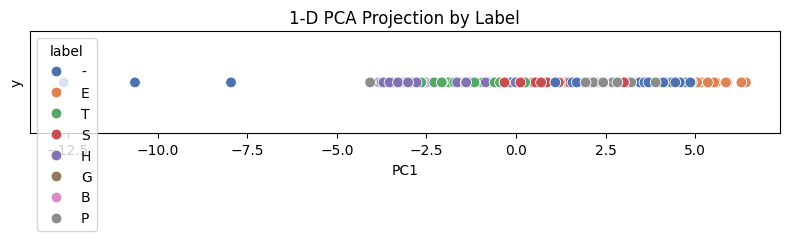

In [28]:
# 2. PCA → 2 components
pca_1     = PCA(n_components=1, random_state=42)
X_pca_1   = pca.fit_transform(X_scaled)

# — build a DataFrame —
df = pd.DataFrame(X_pca_1[:, 0], columns=["PC1"])
df["label"] = labels
df["y"]     = 0                              # dummy y

# — plot a 1-D “scatter” —
plt.figure(figsize=(8, 2))
sns.scatterplot(
    data=df,
    x="PC1",
    y="y", 
    hue="label", 
    palette="deep",
    legend="full",
    s=60
)
plt.yticks([])                               # hide the y-axis
plt.xlabel("PC1")
plt.title("1-D PCA Projection by Label")
plt.tight_layout()
plt.show()

/Users/aliyz/Documents/Personal/Masters/2nd-structure-all/2nd-structure/.venv/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


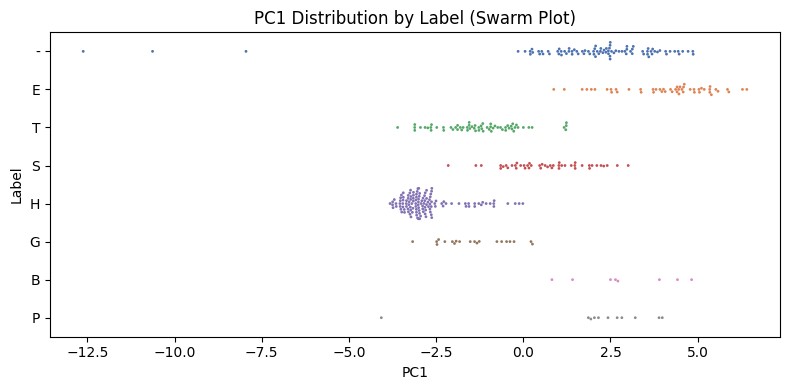

In [35]:
# 3. Swarmplot
plt.figure(figsize=(8, 4))
sns.swarmplot(
    data=df,
    x="PC1",
    y="label",
    palette="deep",
    hue="label",
    legend=False,
    size=2
)
plt.xlabel("PC1")
plt.ylabel("Label")
plt.title("PC1 Distribution by Label (Swarm Plot)")
plt.tight_layout()
plt.show()

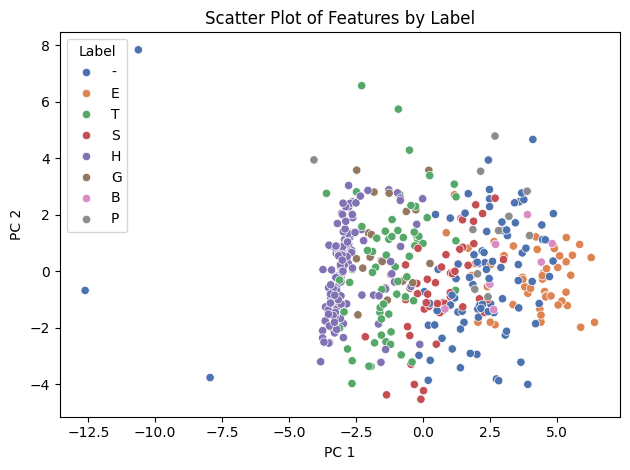

In [33]:
# — build a DataFrame —
df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"]
)
df["label"] = labels

# — plot a 2-D scatter —
sns.scatterplot(
    data=df,
    x="PC1",
    y="PC2",
    hue="label",         # color by label
    legend="full",       # show all classes
    palette="deep"       # let seaborn choose a nice palette
)

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Scatter Plot of Features by Label")
plt.legend(title="Label")
plt.tight_layout()
plt.show()

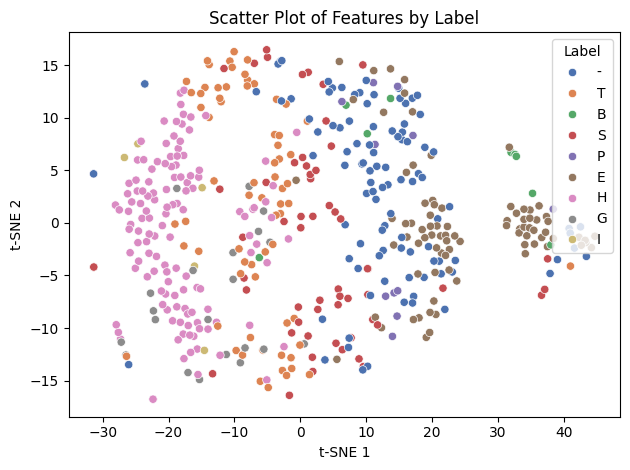

In [8]:
# — build a DataFrame —
df = pd.DataFrame(
    X_tsne,
    columns=["t-SNE1", "t-SNE2"]
)
df["label"] = labels

# — plot a 2-D scatter —
sns.scatterplot(
    data=df,
    x="t-SNE1",
    y="t-SNE2",
    hue="label",         # color by label
    legend="full",       # show all classes
    palette="deep"       # let seaborn choose a nice palette
)

plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("Scatter Plot of Features by Label")
plt.legend(title="Label")
plt.tight_layout()
plt.show()

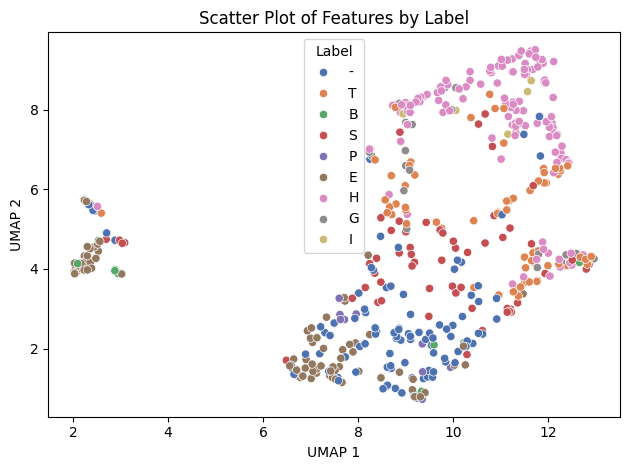

In [10]:
# — build a DataFrame —
df = pd.DataFrame(
    X_umap,
    columns=["UMAP1", "UMAP2"]
)
df["label"] = labels

# — plot a 2-D scatter —
sns.scatterplot(
    data=df,
    x="UMAP1",
    y="UMAP2",
    hue="label",         # color by label
    legend="full",       # show all classes
    palette="deep"       # let seaborn choose a nice palette
)

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Scatter Plot of Features by Label")
plt.legend(title="Label")
plt.tight_layout()
plt.show()